In [1]:
import pandas as pd
# Import required libraries and dependencies

import matplotlib.pyplot as plt
import hvplot.pandas
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Import Modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split

In [9]:
attributes_df = pd.read_csv("../Resources/songAttributes_1999-2019.csv")
attributes_df = attributes_df.drop(columns=["Unnamed: 0"])
print(attributes_df.info())
attributes_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154931 entries, 0 to 154930
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Acousticness      154931 non-null  float64
 1   Album             154931 non-null  object 
 2   Artist            154931 non-null  object 
 3   Danceability      154931 non-null  float64
 4   Duration          154931 non-null  int64  
 5   Energy            154931 non-null  float64
 6   Explicit          154931 non-null  bool   
 7   Instrumentalness  154931 non-null  float64
 8   Liveness          154931 non-null  float64
 9   Loudness          154931 non-null  float64
 10  Mode              154931 non-null  int64  
 11  Name              154931 non-null  object 
 12  Popularity        154931 non-null  int64  
 13  Speechiness       154931 non-null  float64
 14  Tempo             154931 non-null  float64
 15  TimeSignature     154931 non-null  int64  
 16  Valence           15

,Acousticness,Album,Artist,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Name,Popularity,Speechiness,Tempo,TimeSignature,Valence
0,0.000728,Collective Soul (Deluxe Version),Collective Soul,0.520,234947,0.904,False,0.010300,0.0634,-5.030,1,Welcome All Again,35,0.0309,106.022,4,0.365
1,0.018200,Collective Soul (Deluxe Version),Collective Soul,0.581,239573,0.709,False,0.000664,0.1740,-4.909,1,Fuzzy,31,0.0282,120.027,4,0.408
2,0.000473,Collective Soul (Deluxe Version),Collective Soul,0.572,198400,0.918,False,0.000431,0.0977,-3.324,0,Dig,30,0.0559,144.061,4,0.370
3,0.000970,Collective Soul (Deluxe Version),Collective Soul,0.596,231453,0.661,False,0.000033,0.1130,-5.051,1,You,35,0.0254,111.975,4,0.183
4,0.000036,Collective Soul (Deluxe Version),Collective Soul,0.520,222520,0.808,False,0.000010,0.0800,-4.553,0,My Days,21,0.0318,92.721,4,0.666


In [10]:
certs_df = pd.read_csv("../Resources/riaaSingleCerts_1999-2019.csv")
certs_df = certs_df.drop(columns=["X"])
print(certs_df.info())
certs_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2601 entries, 0 to 2600
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        2601 non-null   object
 1   Artist      2601 non-null   object
 2   RiaaStatus  2601 non-null   object
 3   Label       2601 non-null   object
dtypes: object(4)
memory usage: 81.4+ KB
None


,Name,Artist,RiaaStatus,Label
0,Wish Wish,Dj Khaled,Gold,We the Best / Epic
1,Level Up,Ciara,1x Platinum,Beauty Marks Entertainment
2,Con Calma,Daddy Yankee,11x Diamond,Universal Music Latino / El Cartel Records
3,Wish you Were Gay,Billie Eilish,1x Platinum,Darkroom / Interscope Records
4,El Anillo,Jennifer Lopez,6x Multi-Platinum,Sony Latin


In [17]:
merged_df = pd.merge(attributes_df, certs_df, on=["Name", "Artist"], how ="inner")
merged_df.dropna()
merged_df.head()

,Acousticness,Album,Artist,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Name,Popularity,Speechiness,Tempo,TimeSignature,Valence,RiaaStatus,Label
0,0.154000,All The Pain Money Can Buy,Fastball,0.653,257093,0.874,False,0.000014,0.307,-5.660,0,The Way,65,0.0341,120.840,4,0.902,Gold,Hollywood Records
1,0.178000,So Real,Mandy Moore,0.813,234133,0.836,False,0.000066,0.154,-4.230,1,Candy,10,0.0881,100.491,4,0.677,Gold,550 Music/Epic
2,0.435000,Ideal,Ideal,0.702,275173,0.520,False,0.000000,0.299,-8.581,1,Get Gone,35,0.0725,120.005,4,0.467,Gold,Virgin
3,0.000134,All The Good Sh**. 14 Solid Gold Hits (2000-2008),Sum 41,0.348,199493,0.951,False,0.004380,0.138,-5.026,0,The Hell Song,40,0.0771,173.409,4,0.672,Gold,Island Records
4,0.000140,All the Good Shit,Sum 41,0.352,199493,0.954,False,0.002710,0.092,-5.083,0,The Hell Song,29,0.0846,173.392,4,0.552,Gold,Island Records


In [18]:
patterns_and_labels = {
    r'.*Atlantic.*': 'Atlantic',
    r'.*Columbia.*': 'Columbia',
    r'.*Def Jam.*': 'Def Jam',
    r'.*Universal.*': 'Universal',
    r'.*Warner Bros..*': 'Warner Bros.',
    r'.*Capitol.*': 'Capitol',
    r'.*Rca.*': 'Rca',
    r'.*Republic.*': 'Republic',
    r'.*Island.*': 'Island',
    r'.*Interscope.*': 'Interscope',
    r'.*Hollywood.*': 'Hollywood',
    r'.*Arista.*': 'Arista',
    r'.*Sony.*': 'Sony',
    r'.*Mca.*': 'Mca',
    r'.*Roc.*': 'Roc',
    r'.*Warner.*': 'Warner',
    r'.*Glassnote.*': 'Glassnote',
    r'.*Epic.*': 'Epic',
    r'.*Geffen.*': 'Geffen',
    r'.*A&m.*': 'A&m',
    r'.*Bna.*': 'Bna',
    r'.*Virgin.*': 'Virgin',
}

for pattern, label in patterns_and_labels.items():
    merged_df['Label'] = merged_df['Label'].replace({pattern: label}, regex=True)

print(merged_df["Label"].value_counts())
print(merged_df["Label"].nunique())

Label
Atlantic              180
Interscope            113
Columbia              103
Def Jam               100
Republic               85
                     ... 
Giant                   1
s-Curve Records         1
Wheelhouse Records      1
Fearless Records        1
Monkeywrench            1
Name: count, Length: 95, dtype: int64
95


In [19]:
labels_to_replace = list(merged_df["Label"].value_counts()[merged_df["Label"].value_counts() < 3].index)

# Replace in dataframe
for i in labels_to_replace:
    merged_df['Label'] = merged_df['Label'].replace(i,"Other")
    
# Check to make sure binning was successful
merged_df['Label'].value_counts()

Label
Atlantic                     180
Interscope                   113
Columbia                     103
Def Jam                      100
Republic                      85
Rca                           84
Capitol                       71
Warner                        70
Universal                     66
Other                         61
Big Machine Records, Inc.     58
Arista                        57
Epic                          53
Island                        26
Hollywood                     20
Mercury                       16
Jive                          15
A&m                           15
Reprise                       15
Sony                          13
Bna                           12
Mca                           11
Elektra                       10
Geffen                        10
Sire                           9
Wind-Up Records                9
Laface                         9
Glassnote                      8
Curb Records                   8
Big Machine Records            8
j Re

## Random Forests | Binary Classification

In [20]:
merged_df.columns

Index(['Acousticness', 'Album', 'Artist', 'Danceability', 'Duration', 'Energy',
       'Explicit', 'Instrumentalness', 'Liveness', 'Loudness', 'Mode', 'Name',
       'Popularity', 'Speechiness', 'Tempo', 'TimeSignature', 'Valence',
       'RiaaStatus', 'Label'],
      dtype='object')

In [22]:
clean_merged_df_01 = merged_df.drop(columns=['Acousticness', 'Album', 'Artist', 'Danceability',
       'Duration', 'Energy', 'Explicit', 'Instrumentalness', 'Liveness',
       'Loudness', 'Mode', 'Name', 'Speechiness', 'Tempo',
       'TimeSignature', 'Valence', 'RiaaStatus'])
clean_merged_df_01 = pd.get_dummies(clean_merged_df_01)
clean_merged_df_01["is_popular"] = (clean_merged_df_01["Popularity"] >= 40)
clean_merged_df_01 = clean_merged_df_01.drop(columns= ["Popularity"])
clean_merged_df_01.head(3)

,Label_A&m,Label_Arista,Label_Atlantic,Label_Bad Boy,Label_Big Machine Records,"Label_Big Machine Records, Inc.",Label_Big Oomp Records,Label_Bna,Label_Capitol,Label_Casablanca,...,Label_Stoney Creek Records,Label_Universal,Label_Virgin,Label_Warner,Label_Wind-Up Records,Label_Young Money / Cash Money,Label_j Records,Label_the Bicycle Music Company,Label_the Valory Music Co,is_popular
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [23]:
X = clean_merged_df_01.copy()
X.drop("is_popular", axis=1, inplace=True)
X.head()

,Label_A&m,Label_Arista,Label_Atlantic,Label_Bad Boy,Label_Big Machine Records,"Label_Big Machine Records, Inc.",Label_Big Oomp Records,Label_Bna,Label_Capitol,Label_Casablanca,...,Label_Sony,Label_Stoney Creek Records,Label_Universal,Label_Virgin,Label_Warner,Label_Wind-Up Records,Label_Young Money / Cash Money,Label_j Records,Label_the Bicycle Music Company,Label_the Valory Music Co
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
y = clean_merged_df_01["is_popular"].values.reshape(-1, 1)
y[:5]


array([[ True],
       [False],
       [False],
       [ True],
       [False]])

In [27]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# Creating StandardScaler instance
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [28]:
#Creating the Model
RF_model = RandomForestClassifier(n_estimators=500, random_state=78)
RF_model = RF_model.fit(X_train_scaled, y_train)
predictions = RF_model.predict(X_test_scaled)

c:\Users\Aspire-PC\anaconda3\envs\orange3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [29]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,34,105
Actual 1,33,178


Accuracy Score : 0.6057142857142858
Classification Report
              precision    recall  f1-score   support

       False       0.51      0.24      0.33       139
        True       0.63      0.84      0.72       211

    accuracy                           0.61       350
   macro avg       0.57      0.54      0.53       350
weighted avg       0.58      0.61      0.57       350



In [30]:
# Random Forests in sklearn will automatically calculate feature importance
importances = RF_model.feature_importances_
# We can sort the features by their importance
sorted(zip(RF_model.feature_importances_, X.columns), reverse=True)

[(0.11856783998559202, 'Label_Republic'),
 (0.06119996028883922, 'Label_Rca'),
 (0.046752447270466825, 'Label_Universal'),
 (0.04628788928640627, 'Label_Interscope'),
 (0.045831229746515385, 'Label_the Valory Music Co'),
 (0.04186797096539251, 'Label_Mca'),
 (0.03643307418236626, 'Label_Koch'),
 (0.0357856814307655, 'Label_Big Oomp Records'),
 (0.03307420618008062, 'Label_Curb Records'),
 (0.03241293500802485, 'Label_Reprise'),
 (0.03134142299538087, 'Label_Glassnote'),
 (0.02466795229330257, 'Label_Island'),
 (0.0235027380667532, 'Label_the Bicycle Music Company'),
 (0.022300620971220573, 'Label_Sire'),
 (0.017265212241566383, 'Label_Columbia'),
 (0.016546968680576535, 'Label_Sony'),
 (0.016425512715019585, 'Label_Wind-Up Records'),
 (0.014921208360255504, 'Label_Warner'),
 (0.014864850290303855, 'Label_Dreamworks Nashville'),
 (0.014822747277145902, 'Label_Stoney Creek Records'),
 (0.014433799137439085, 'Label_Bad Boy'),
 (0.014323172821503277, 'Label_Mercury Nashville'),
 (0.0140241

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

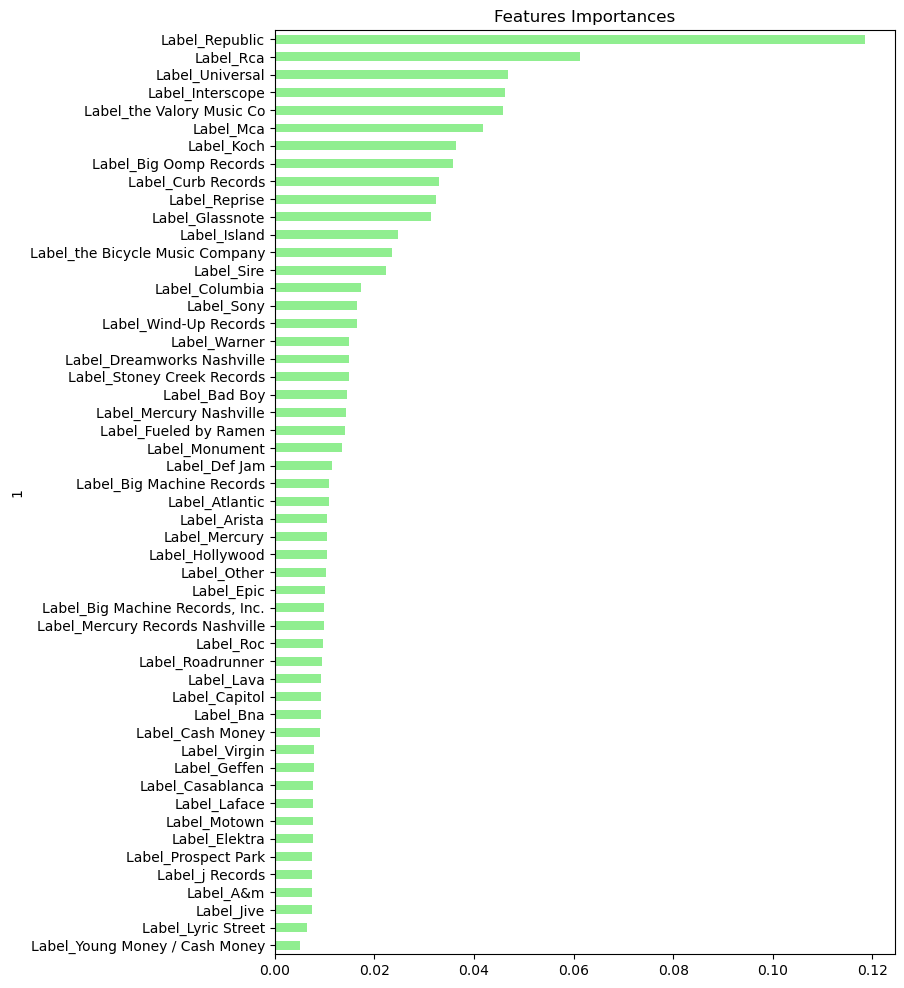

In [31]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(RF_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances',figsize=(8,12), legend=False)

## Random Forests | Regression

In [33]:
clean_merged_df_02 = merged_df.drop(columns=['Acousticness', 'Album', 'Artist', 'Danceability',
       'Duration', 'Energy', 'Explicit', 'Instrumentalness', 'Liveness',
       'Loudness', 'Mode', 'Name', 'Speechiness', 'Tempo',
       'TimeSignature', 'Valence', 'RiaaStatus'])
clean_merged_df_02 = pd.get_dummies(clean_merged_df_02)
clean_merged_df_02.head(3)

,Popularity,Label_A&m,Label_Arista,Label_Atlantic,Label_Bad Boy,Label_Big Machine Records,"Label_Big Machine Records, Inc.",Label_Big Oomp Records,Label_Bna,Label_Capitol,...,Label_Sony,Label_Stoney Creek Records,Label_Universal,Label_Virgin,Label_Warner,Label_Wind-Up Records,Label_Young Money / Cash Money,Label_j Records,Label_the Bicycle Music Company,Label_the Valory Music Co
0,65,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,35,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [34]:
X = clean_merged_df_02.copy()
X.drop("Popularity", axis=1, inplace=True)
X.head()

,Label_A&m,Label_Arista,Label_Atlantic,Label_Bad Boy,Label_Big Machine Records,"Label_Big Machine Records, Inc.",Label_Big Oomp Records,Label_Bna,Label_Capitol,Label_Casablanca,...,Label_Sony,Label_Stoney Creek Records,Label_Universal,Label_Virgin,Label_Warner,Label_Wind-Up Records,Label_Young Money / Cash Money,Label_j Records,Label_the Bicycle Music Company,Label_the Valory Music Co
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
y = clean_merged_df_02["Popularity"].values.reshape(-1, 1)
y[:5]


array([[65],
       [10],
       [35],
       [40],
       [29]], dtype=int64)

In [36]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# Creating StandardScaler instance
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [37]:
# Create a Random Forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

c:\Users\Aspire-PC\anaconda3\envs\orange3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error: 500.91397862678326


In [38]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.13007729256192244, 'Label_Republic'),
 (0.061775307569020346, 'Label_Rca'),
 (0.05867895219076865, 'Label_Universal'),
 (0.04976038730983636, 'Label_the Bicycle Music Company'),
 (0.045483156920914876, 'Label_Mca'),
 (0.0391691522139476, 'Label_Curb Records'),
 (0.036674345181149225, 'Label_Glassnote'),
 (0.036227936986062005, 'Label_Warner'),
 (0.03583534552394457, 'Label_Interscope'),
 (0.026596109595934076, 'Label_Reprise'),
 (0.02245901840135307, 'Label_Arista'),
 (0.022333466285434898, 'Label_Roc'),
 (0.02006967222596738, 'Label_Koch'),
 (0.019895250662866418, 'Label_the Valory Music Co'),
 (0.01880111405402226, 'Label_Sire'),
 (0.018519233797871074, 'Label_Big Oomp Records'),
 (0.01815481374497537, 'Label_Columbia'),
 (0.01732305052701002, 'Label_Wind-Up Records'),
 (0.01639350975340158, 'Label_Motown'),
 (0.01621319956543697, 'Label_j Records'),
 (0.01566289061586585, 'Label_Def Jam'),
 (0.015627998984211924, 'Label_Big Machine Records, Inc.'),
 (0.014329329282098655, 'Label

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

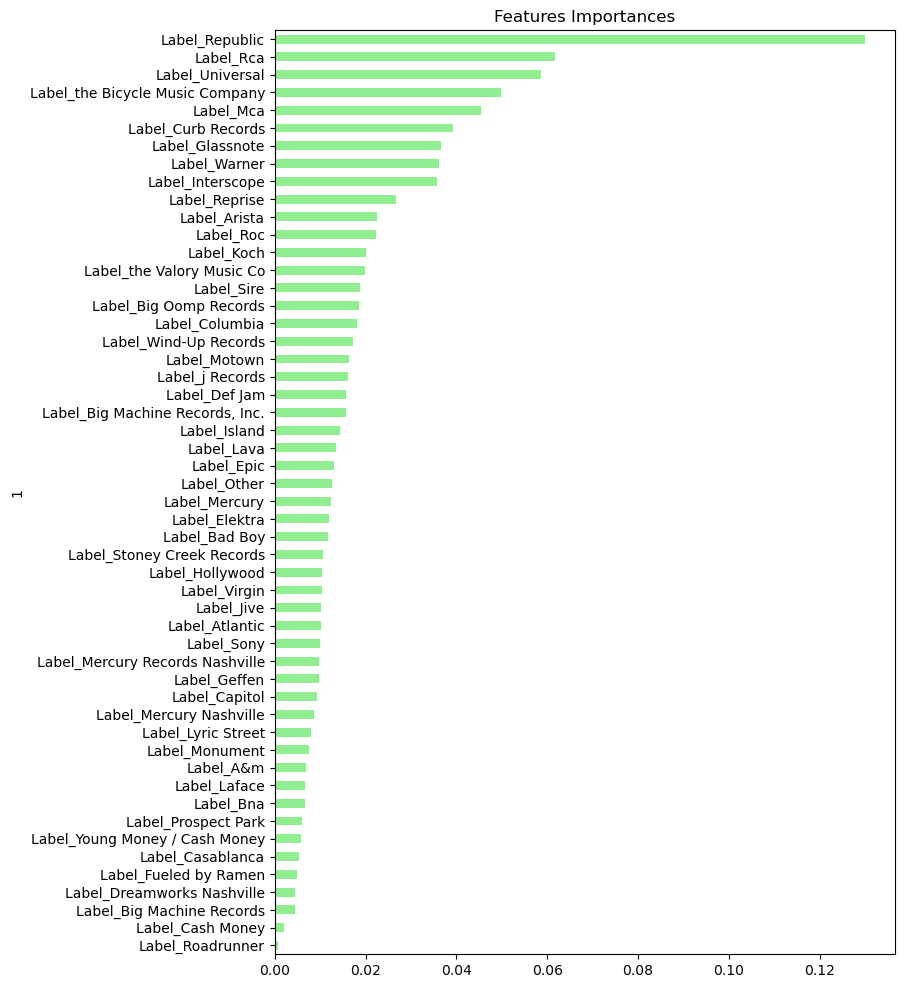

In [39]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances',figsize=(8,12), legend=False)

# Labels y Grammys

### Relación entre qué labels producen la mayor cantidad de grammys

In [40]:
grammys_df = pd.read_csv("../Resources/grammyAlbums_199-2019.csv")
grammys_df = grammys_df.drop(columns=["Unnamed: 0"])
grammys_df.head(3)


,Award,GrammyYear,Genre,Album,Artist
0,Album Of The Year,2018,General,Golden Hour,Kacey Musgraves
1,Best Traditional Pop Vocal Album,2018,Traditional Pop,My Way,Willie Nelson
2,Best Pop Vocal Album,2018,Pop,Sweetener,Ariana Grande


In [42]:
#merged_df = pd.merge(attributes_df, df_05, on=["Name", "Artist"], how ="inner")

merged_df_03 = pd.merge(merged_df, grammys_df, on = ["Album", "Artist"], how = "outer")
merged_df_03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2316 entries, 0 to 2315
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Acousticness      1423 non-null   float64
 1   Album             2316 non-null   object 
 2   Artist            2279 non-null   object 
 3   Danceability      1423 non-null   float64
 4   Duration          1423 non-null   float64
 5   Energy            1423 non-null   float64
 6   Explicit          1423 non-null   object 
 7   Instrumentalness  1423 non-null   float64
 8   Liveness          1423 non-null   float64
 9   Loudness          1423 non-null   float64
 10  Mode              1423 non-null   float64
 11  Name              1423 non-null   object 
 12  Popularity        1423 non-null   float64
 13  Speechiness       1423 non-null   float64
 14  Tempo             1423 non-null   float64
 15  TimeSignature     1423 non-null   float64
 16  Valence           1423 non-null   float64


In [43]:
merged_df_03.columns

Index(['Acousticness', 'Album', 'Artist', 'Danceability', 'Duration', 'Energy',
       'Explicit', 'Instrumentalness', 'Liveness', 'Loudness', 'Mode', 'Name',
       'Popularity', 'Speechiness', 'Tempo', 'TimeSignature', 'Valence',
       'RiaaStatus', 'Label', 'Award', 'GrammyYear', 'Genre'],
      dtype='object')

In [44]:
clean_merged_df_03 = merged_df_03.drop(columns=["Acousticness","Danceability","Duration","Energy","Explicit","Instrumentalness",
                                                "Liveness","Loudness","Speechiness","Tempo","TimeSignature","Valence",
                                                "Album","Artist","Name","RiaaStatus", "GrammyYear", "Genre", "Mode", "Popularity"])

#clean_merged_df_03 = pd.get_dummies(clean_merged_df_03)
clean_merged_df_03['Award'] = clean_merged_df_03['Award'].notna()  # Converts non-NaN values to True, NaN values to False
clean_merged_df_03['Award'] = clean_merged_df_03['Award'].astype(bool)  # Converts True/False to boolean values

clean_merged_df_03 = pd.get_dummies(clean_merged_df_03)
clean_merged_df_03

,Award,Label_A&m,Label_Arista,Label_Atlantic,Label_Bad Boy,Label_Big Machine Records,"Label_Big Machine Records, Inc.",Label_Big Oomp Records,Label_Bna,Label_Capitol,...,Label_Sony,Label_Stoney Creek Records,Label_Universal,Label_Virgin,Label_Warner,Label_Wind-Up Records,Label_Young Money / Cash Money,Label_j Records,Label_the Bicycle Music Company,Label_the Valory Music Co
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2312,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2313,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2314,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
X = clean_merged_df_03.copy()
X.drop("Award", axis=1, inplace=True)
X.head()

,Label_A&m,Label_Arista,Label_Atlantic,Label_Bad Boy,Label_Big Machine Records,"Label_Big Machine Records, Inc.",Label_Big Oomp Records,Label_Bna,Label_Capitol,Label_Casablanca,...,Label_Sony,Label_Stoney Creek Records,Label_Universal,Label_Virgin,Label_Warner,Label_Wind-Up Records,Label_Young Money / Cash Money,Label_j Records,Label_the Bicycle Music Company,Label_the Valory Music Co
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
y = clean_merged_df_03["Award"].values.reshape(-1, 1)
y[:5]


array([[False],
       [False],
       [False],
       [False],
       [False]])

In [47]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# Creating StandardScaler instance
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [48]:
# Create a Random Forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

c:\Users\Aspire-PC\anaconda3\envs\orange3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error: 0.0403140229829951


In [49]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.06129422614677121, 'Label_Atlantic'),
 (0.045298612633153705, 'Label_Columbia'),
 (0.0450641044182457, 'Label_Arista'),
 (0.044625943783973124, 'Label_Universal'),
 (0.044407085605750296, 'Label_Epic'),
 (0.04438923336044071, 'Label_Warner'),
 (0.0440454755905868, 'Label_Def Jam'),
 (0.04337467897396963, 'Label_Capitol'),
 (0.04301316271446757, 'Label_Other'),
 (0.04277922802524086, 'Label_Rca'),
 (0.042663192848406924, 'Label_Interscope'),
 (0.04243131412824561, 'Label_Republic'),
 (0.028765000217142588, 'Label_Island'),
 (0.02590043334620361, 'Label_Big Machine Records, Inc.'),
 (0.022539054814162025, 'Label_Hollywood'),
 (0.021812972288524617, 'Label_Mercury'),
 (0.019756280789655103, 'Label_A&m'),
 (0.01974251758281261, 'Label_Sony'),
 (0.019555968192997226, 'Label_Reprise'),
 (0.01816974095654286, 'Label_Jive'),
 (0.01725155006941641, 'Label_Sire'),
 (0.0171724509737979, 'Label_Bna'),
 (0.01660402112501104, 'Label_Mca'),
 (0.015965991167098223, 'Label_Laface'),
 (0.01595791233

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

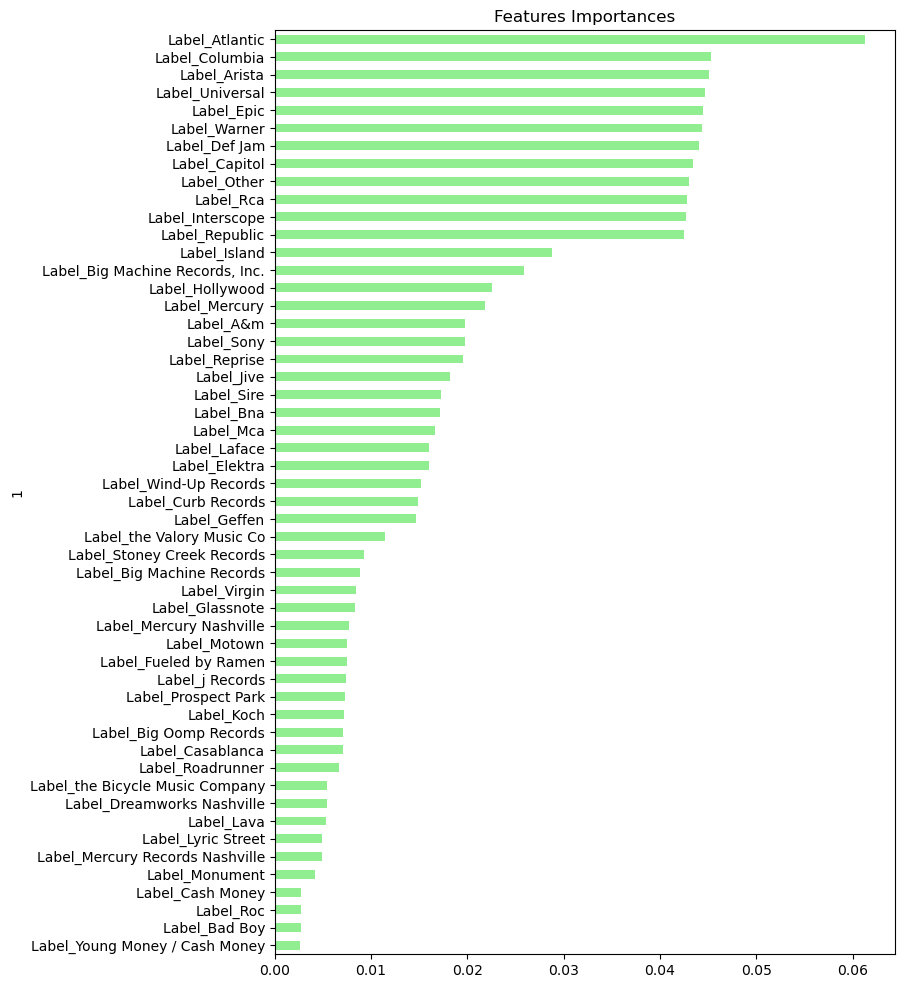

In [50]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances',figsize=(8,12), legend=False)

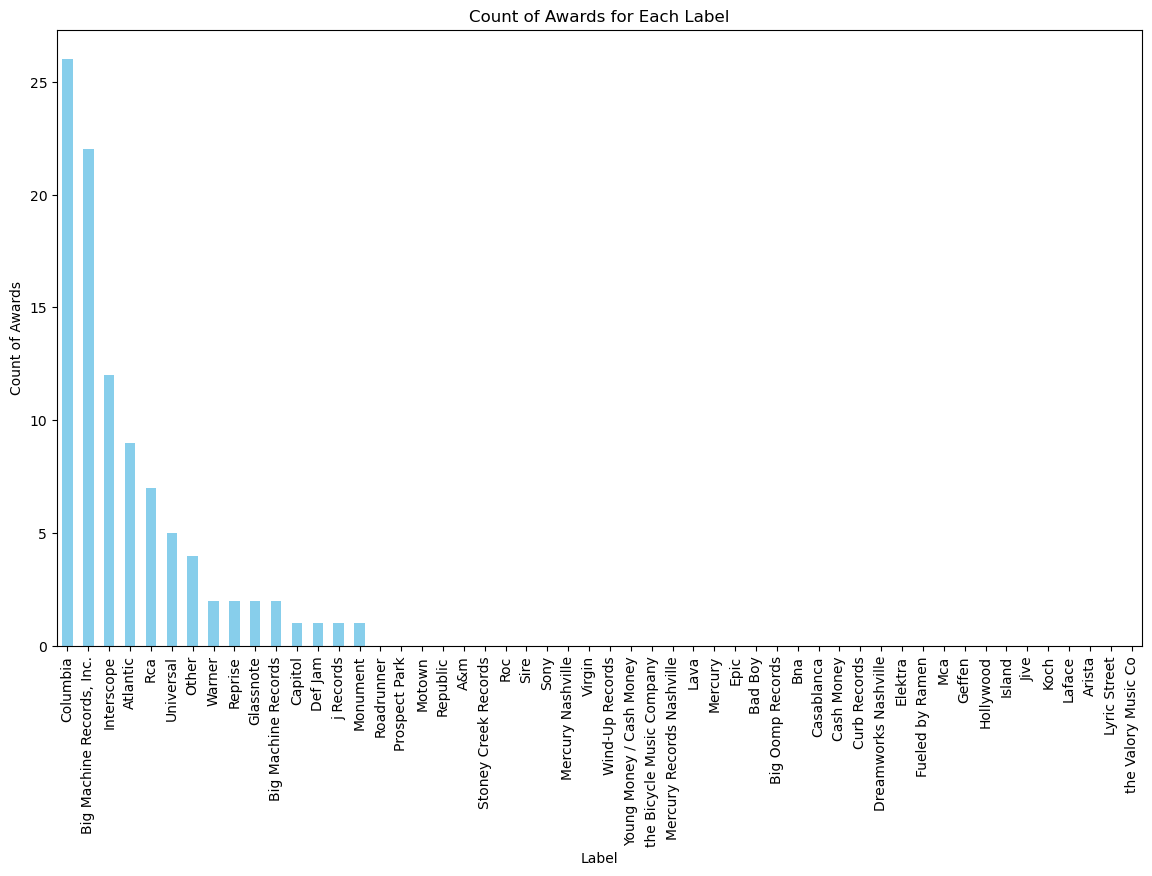

In [71]:
labels = merged_df_03.groupby("Label")["Award"].count()
labels = labels.sort_values(ascending=False)
labels.plot(kind='bar', color='skyblue', figsize=(14,8))
plt.xlabel('Label')
plt.ylabel('Count of Awards')
plt.title('Count of Awards for Each Label')
plt.show()